# [Lab Session 3](fourier.ipynb)


In [92]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


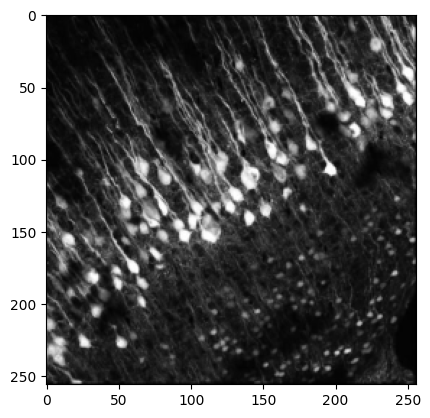

In [93]:
cell_img = plt.imread('data/cells.png')
plt.imshow(cell_img)
cell_img = resize(cell_img, (256,256))
plt.imshow(cell_img, cmap='gray')


**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [94]:
cell_ft = np.fft.fft2(cell_img)
print(cell_ft.dtype)

complex128


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [95]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

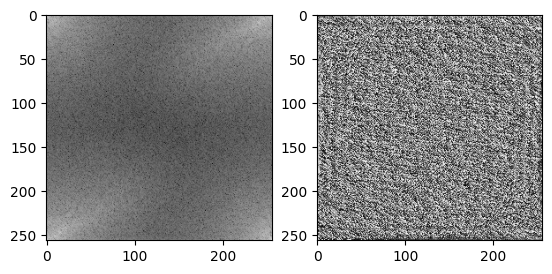

In [96]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


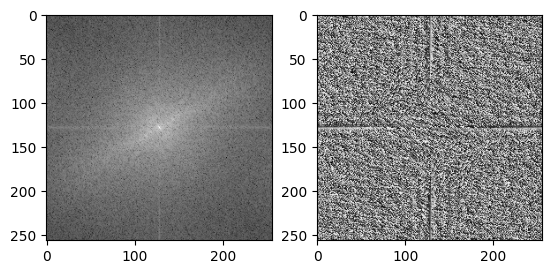

In [97]:
cell_ft0 = np.fft.fftshift(cell_ft)
amplitudecsh = np.abs(cell_ft0)
phasecsh = np.angle(cell_ft0)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitudecsh), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phasecsh, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


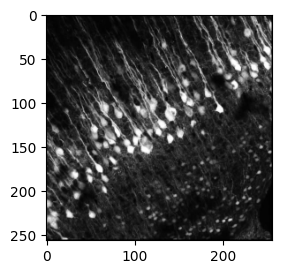

In [98]:
cell_ft_sr = np.fft.ifftshift(cell_ft0)
cell_ft_ifft = np.fft.ifft2(cell_ft_sr)

amplitude = np.abs(cell_ft_ifft)
phase2 = np.angle(cell_ft_ifft)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(amplitude, 'gray')


---


**[Task 2 (a).]()** Load the brain CT image.


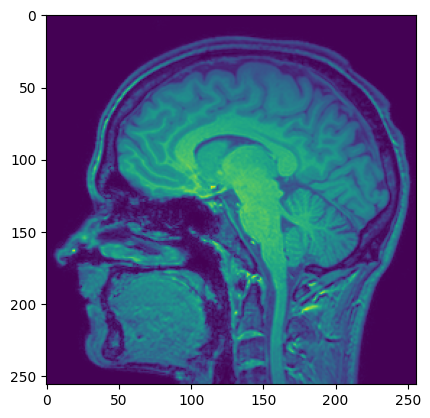

In [99]:
brainct = plt.imread('data/brain_ct.png')
plt.imshow(brainct)


**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [141]:
brainct_ft = np.fft.fft2(brainct)
brain_ftsh = np.fft.fftshift(brainct_ft)


amplitude_br = np.abs(brain_ftsh)
phase_br = np.angle(brain_ftsh)


In [ ]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)


**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


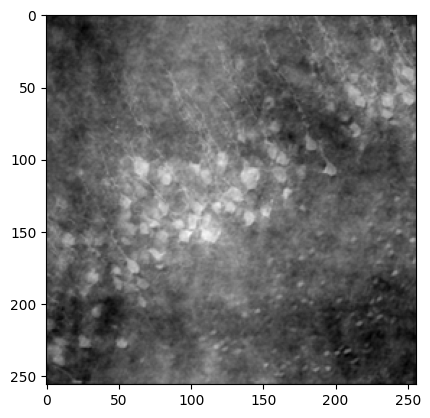

In [140]:
brainct_ft = np.fft.fft2(brainct)
cell_ft = np.fft.fft2(cell_img)

amplitudebrain = np.abs(brainct_ft)
phasecells = np.angle(cell_ft)

merged_2c = to_complex_array(amplitudebrain, phasecells)
merged_2c_ifft = np.fft.ifft2(merged_2c)
plt.imshow(merged_2c_ifft.real, cmap='gray')



**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


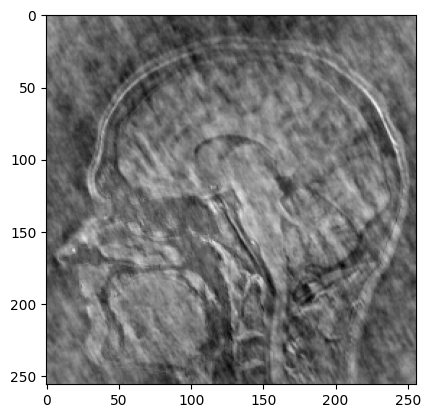

In [112]:
brainct_ft = np.fft.fft2(brainct)
cell_ft = np.fft.fft2(cell_img)

amplitudecell = np.abs(cell_ft)
phasebrain = np.angle(brainct_ft)

merged_2d = to_complex_array(amplitudecell, phasebrain)
merged_2d_ifft = np.fft.ifft2(merged_2d)
plt.imshow(merged_2d_ifft.real, cmap='gray')

# Vor allem die Phase ist Informationsträger



---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [160]:
lowpass = np.zeros_like(cell_img)
filter_window_size = 25
filter_window_size_2 = filter_window_size //2
center = lowpass.shape[0] // 2
start, end = center - filter_window_size_2, center + filter_window_size_2

lowpass[start:end, start:end] = 1

**[Task 3 (b).]()** Create a highpass filter maks.


In [161]:
highpass = 1-lowpass


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_1371/2417220829.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amplitude_low))
/tmp/ipykernel_1371/2417220829.py:13: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(amplitude_high))


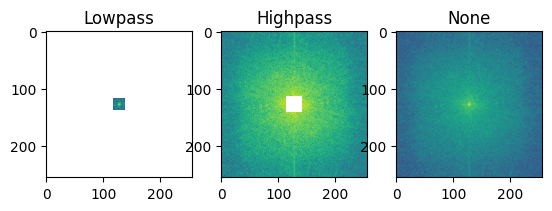

In [162]:
amplitude_br = np.abs(brain_ftsh)

amplitude_low = amplitude_br * lowpass
amplitude_high = amplitude_br * highpass


plt.subplot(1,3,1)
plt.title('Lowpass')
plt.imshow(np.log(amplitude_low))

plt.subplot(1,3,2)
plt.title('Highpass')
plt.imshow(np.log(amplitude_high))

plt.subplot(1,3,3)
plt.title('None')
plt.imshow(np.log(amplitude_br))

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


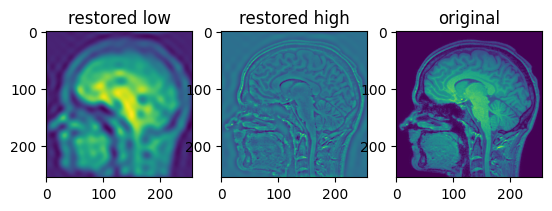

In [163]:
phase_br = np.angle(brain_ftsh)

# Merge filtered image with phase of brain
merged_low = to_complex_array(amplitude_low, phase_br)
merged_high = to_complex_array(amplitude_high, phase_br)

# Reverse shift
merged_low_sr = np.fft.ifftshift(merged_low)
merged_high_sr = np.fft.ifftshift(merged_high)

# Ifft
merged_low_ifft = np.fft.ifft2(merged_low_sr)
merged_high_ifft = np.fft.ifft2(merged_high_sr)

plt.subplot(1,3,1)
plt.title('restored low')
plt.imshow(merged_low_ifft.real)

plt.subplot(1,3,2)
plt.title('restored high')
plt.imshow(merged_high_ifft.real)

plt.subplot(1,3,3)
plt.title('original')
plt.imshow(brainct)


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [ ]:


def twod_dft(img):
    dft = np.zeros(img.shape, dtype=complex)
    M, N = img.shape
    for u in range (M) :
        for v in range (N) :
            sumuv = 0
            for x in range (M) :
                for y in range (N) :
                    exponent = -2j * np.pi * ((u * x / M) + (v * y / N))
                    sumuv += img[x, y] * np.exp(exponent)
            dft[u, v] = sumuv * 1/(M*N)
    return dft

i_tried = twod_dft(brainct)


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [181]:
def twod_idft(dft):
    idft = np.zeros(dft.shape, dtype=complex)
    M, N = dft.shape
    for u in range (M) :
        for v in range (N) :
            sumuv = 0
            for x in range (M) :
                for y in range (N) :
                    exponent = 2j * np.pi * ((u * x / M) + (v * y / N))
                    sumuv += dft[x, y] * np.exp(exponent)
            idft[u, v] = sumuv * 1/(M*N)
    return idft


Due to high computational costs, we need to resize the image.


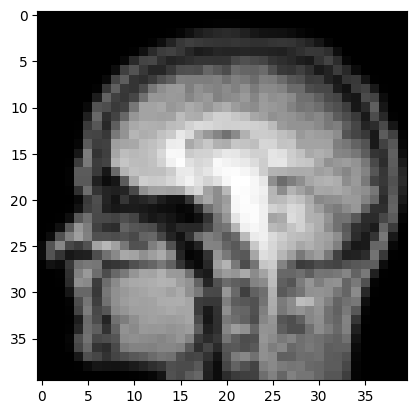

In [175]:
test_img = resize(brainct, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


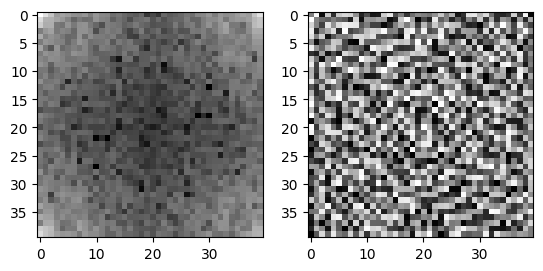

In [182]:
i_tried = twod_dft(test_img)
amplitude_test = np.abs(i_tried)
phase_test = np.angle(i_tried)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_test), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_test, 'gray')

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


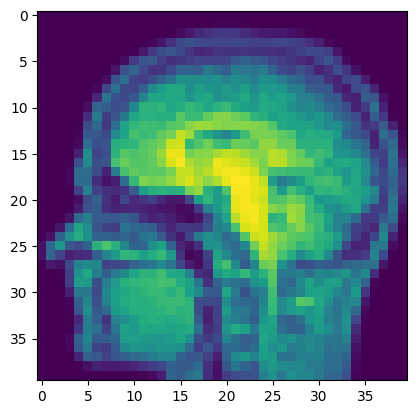

In [184]:
i_tried2 = twod_idft(i_tried)
plt.imshow(i_tried2.real)

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


/tmp/ipykernel_1371/432610592.py:4: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(i_tried.real))
/tmp/ipykernel_1371/432610592.py:6: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(they_did.real))


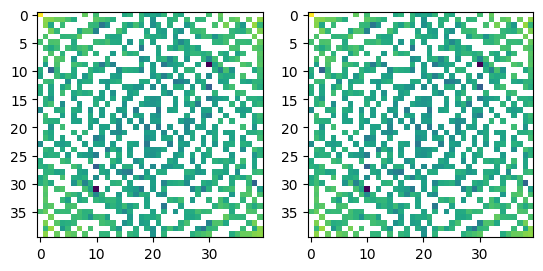

In [195]:
they_did = np.fft.fft2(test_img, norm='forward')
np.allclose(i_tried, they_did)
plt.subplot(1,2,1)
plt.imshow(np.log(i_tried.real))
plt.subplot(1,2,2)
plt.imshow(np.log(they_did.real))

**[Task 4 (f).]()** Round the arrays and compare them again.


In [197]:
np.mean(np.abs(i_tried - they_did))
mine = np.round(i_tried, 6)
not_mine = np.round(they_did, 6)
(mine == not_mine).all()

True

**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [196]:
%timeit np.fft.fft2(test_img, norm='forward')
%timeit twod_dft(test_img)


27.7 μs ± 1.36 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
4.31 s ± 58.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
